# Exploratory Data Analysis

### Data Source: 
https://huggingface.co/datasets/BrotherTony/employee-burnout-turnover-prediction-800k


### Quick Information (from dataset website):
- Total Records	800,000+
- Departments	38 unique divisions
- Job Roles	300+ distinct positions
- Employee Personas	12 behavioral archetypes
- Features per Record	30+ attributes
- Salary Range	$27K - $384K

### Environment Setup Requirements:
- A Jupyter Notebook environment 
    (via Jupyter extensions in Visual Studio Code, Google Colab's Jupyter Notebook, or others)
- Python 3.12+ Kernel
- Pandas, Numpy, Seaborn, and matplotlib.pyplot libraries

## Part 1: Data Exploration

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read dataset
data_path = 'data/employee-burnout-turnover-prediction-800k/synthetic-employee-dataset.json'
df = pd.read_json(data_path)
df.head(5)

,employee_id,role,job_level,department,tenure_months,salary,performance_score,satisfaction_score,workload_score,team_sentiment,...,goal_achievement_rate,stress_level,burnout_risk,left_company,turnover_reason,risk_factors_summary,turnover_probability_generated,persona_name,role_complexity_score,career_progression_score
0,SYN_00000000,,Mid,Research & Development,169,79704.579059,0.632482,0.623746,0.758117,0.662335,...,0.632482,0.908992,0.866643,False,Not Applicable,Severe Burnout Risk,0.290979,ChangeResistor,0.2,1.000000
1,SYN_00000001,Customer Success Manager,Manager,Research & Development,54,29694.288831,0.538587,0.982556,0.788416,0.934661,...,0.538587,0.363321,0.218996,False,Not Applicable,Low Risk,0.156002,NewEnthusiast,0.2,1.000000
2,SYN_00000002,Administrative Assistant,Entry,HR,1,62208.470185,0.624656,0.767200,0.697617,0.888559,...,0.624656,0.664378,0.541531,True,Personal / Relocation,Low Risk,0.233897,NewEnthusiast,0.2,0.836495
3,SYN_00000003,Senior Manager,Manager,Research & Development,31,236066.567114,0.959320,0.185888,0.493143,0.732189,...,0.959320,1.000000,1.000000,False,Not Applicable,Severe Burnout Risk,0.351682,OverachievingSprinter,0.2,1.000000
4,SYN_00000004,Anonymous Employee,Mid,Research & Development,131,37306.328156,0.677305,0.566706,0.567230,0.817545,...,0.677305,0.723049,0.614825,False,Not Applicable,Low Risk,0.272910,SeasonedExpert,0.2,1.000000


In [3]:
# Optionally, read the ds directly from hugging face source:
# from datasets import load_dataset
# dataset = load_dataset("BrotherTony/employee-burnout-turnover-prediction-800k")
# df = dataset["train"].to_pandas()

In [4]:
# Basic Data Exploration
print('Data Shape: ', df.shape)
print('Data Information ', df.info())

Data Shape:  (849999, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849999 entries, 0 to 849998
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   employee_id                     849999 non-null  object 
 1   role                            849999 non-null  object 
 2   job_level                       849999 non-null  object 
 3   department                      849999 non-null  object 
 4   tenure_months                   849999 non-null  int64  
 5   salary                          849999 non-null  float64
 6   performance_score               849999 non-null  float64
 7   satisfaction_score              849999 non-null  float64
 8   workload_score                  849999 non-null  float64
 9   team_sentiment                  849999 non-null  float64
 10  recent_feedback                 849999 non-null  object 
 11  communication_patterns          849999 non-null  obj

### Milestone 2 answers:

**1. How many observations does your dataset have?**
- There are 849999 observations.

**2. Describe all columns in your dataset their scales and data distributions. Describe the categorical and continuous variables in your dataset. Describe your target column.**
- *`employee_id`*: Unique synthetic identifier
- *`role`*: Job title (300+ varieties)
- *`job_level`*: Entry | Mid | Senior | Manager | Lead
- *`department`*: Business unit (38 departments)
- *`tenure_months`*: Time with company (1-357 months)
- *`salary`*: Annual USD ($27K-$3384K range)
- *`performance_score`*: Normalized 0-1 rating
- *`satisfaction_score`*: Employee happiness (0-1)
- *`workload_score`*: Workload burden indicator
- *`team_sentiment`*: Team morale (0-1)
- *`recent_feedback`*: Employee's anonymous assessment of company
- *`communication_patterns`*: Persona-based style
- *`project_completion_rate`*: Delivery success metric
- *`overtime_hours`*: Extra hours logged (0-74 range)
- *`training_participation`*: L&D engagement
- *`collaboration_score`*: Teamwork rating
- *`technical_skills`*: Array of tech skills (4-9 per employee)
- *`soft_skills`*: Array of soft skills (3-7 per employee)
- *`email_sentiment`*: Email tone analysis
- *`slack_activity`*: Chat platform usage
- *`meeting_participation`*: Meeting engagement
- *`goal_achievement_rate`*: Objective completion
- *`stress_level`*: Stress assessment (0-1)
- *`burnout_risk`*: Burnout probability (0-1)
- *`left_company`*: Boolean exit flag
- *`turnover_reason`*: Exit category (if applicable)
- *`risk_factors_summary`*: Low | Medium | High | Severe risk
- *`turnover_probability_generated`**: ML-predicted churn risk
- *`persona_name`*: Type of employee (OverachievingSprinter, BurntOutStar, QuietAchiever, NewEnthusiast, StrugglingLearner, SteadyEddy, ChangeResistor, SeasonedExpert, SocialCatalyst, 9-to-5Clockwatcher, AmbitiousClimber, CorporateNavigator)
- *`role_complexity_score`*: Job difficulty rating
- *`career_progression_score`*: Growth trajectory


    Categorical variables: 
    - role, job_level, department, communication_patterns, technical_skills, soft_skills, left_company, turnover_reason, risk_factors_summary, persona_name

    Continuous variables:
    - tenure_months, salary, performance_score, satisfaction_score, workload_score, team_sentiment, project_completion_rate, overtime_hours, training_participation, collaboration_score, email_sentiment, slack_activity, meeting_participation, goal_achievement_rate, stress_level, burnout_risk, turnover_probability_generated, role_complexity_score, career_progression_score

    Target column:
    - left_company. This is the Boolean column that determines whether an employee has left the company or not. Since we want to model the probability that an employee leaves the company, this is the key target column.

**3. Do you have missing and duplicate values in your dataset?**\
    There is no duplicate observation. There are some missing data such as various labels indicating the same missing data (Anonymous Employee, Current Employee - Anonymous Employee, " ", ...) for the _role_ column. Another example is "Not Applicable" in _turnover_reason_ column.

## Part 2: Data Plots

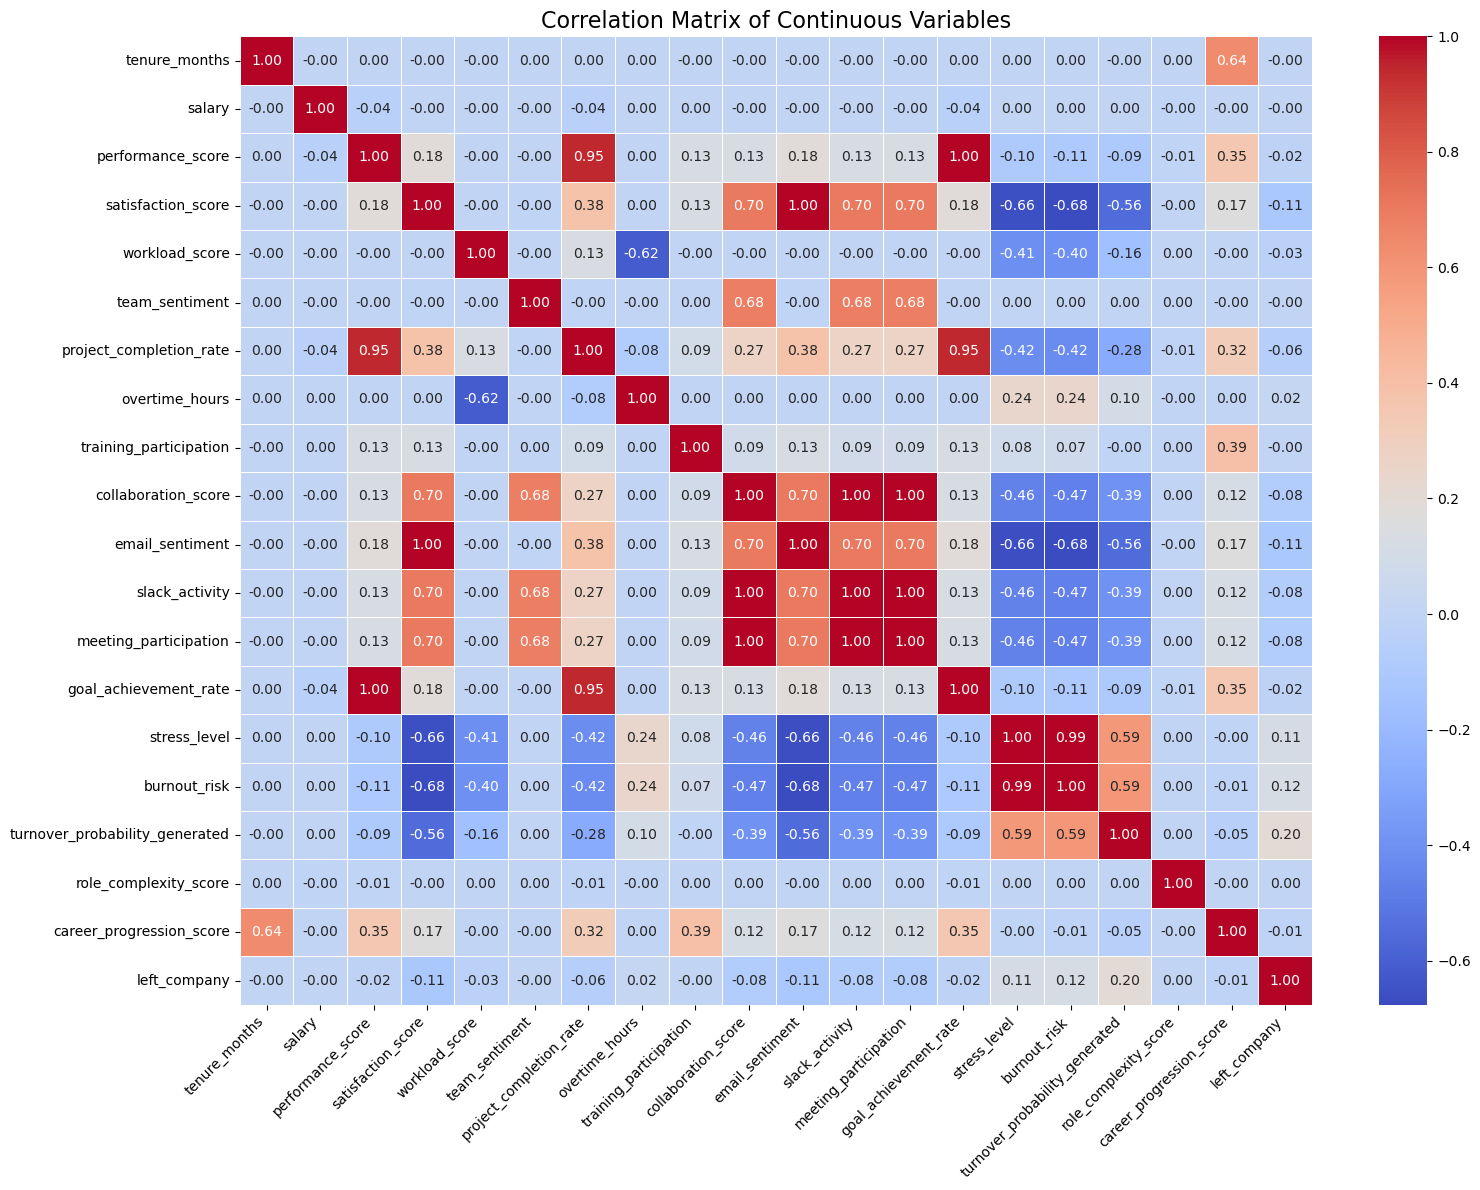

In [5]:
original_continuous_vars = [
    'tenure_months', 'salary', 'performance_score', 'satisfaction_score', 
    'workload_score', 'team_sentiment', 'project_completion_rate', 
    'overtime_hours', 'training_participation', 'collaboration_score', 
    'email_sentiment', 'slack_activity', 'meeting_participation', 
    'goal_achievement_rate', 'stress_level', 'burnout_risk', 
    'turnover_probability_generated', 'role_complexity_score', 
    'career_progression_score'
]

target_var = ['left_company']

corr_matrix = df[ original_continuous_vars + target_var ].corr()

plt.figure(figsize=(16, 12))

sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=.5
)

plt.title('Correlation Matrix of Continuous Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


**Heatmap takeaways:**
- The correlations show that high workload_score is directly linked to high stress_level and burnout_risk. 
- These burnout factors are strongly negatively correlated with satisfaction_score and performance_score, and positively linked to a higher turnover_probability_generated. 
- There's a logical connection between longer tenure_months and a higher career_progression_score.


- stress_level and burnout_risk are strongly correlated to each other (0.99-1.00). We are dropping stress_level and keeping burnout_risk.
- performance_score, goal_achievement_rate, and project_completion_rate are all highly correlated to each other (0.95-1.00), so we're using only one, performance_score, and drop the two others.

- slack_activity, meeting_participation, and collaboration_score are all extremely related (mostly 1.00). we're keeping collaboration_score and dropping slack_activity and meeting_participation.
- satisfaction_score correlates highly with email_sentiment, dropping email_sentiment.

In [6]:
print('Num columns before dropping: ', len(df.columns))
columns_remove = ['stress_level', 'slack_activity', 'goal_achievement_rate', 'project_completion_rate', 'meeting_participation', 'email_sentiment']
df.drop(columns=columns_remove, errors='ignore', inplace=True)
print('Num columns after dropping: ', len(df.columns))

continuous_vars = [s for s in original_continuous_vars if s not in columns_remove]


Num columns before dropping:  31
Num columns after dropping:  25


Successfully saved pie chart to 'job_level_pie_chart.png'


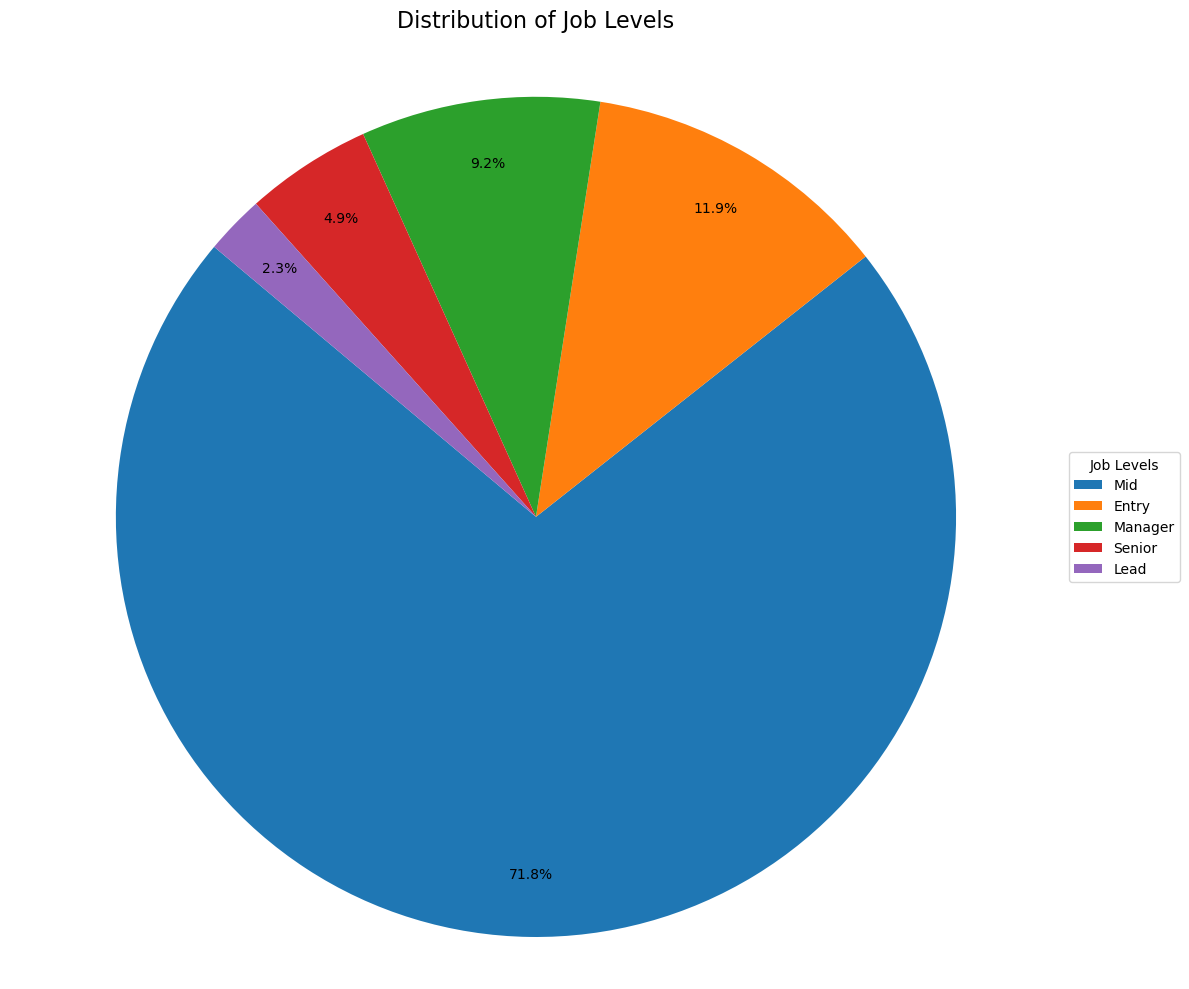

In [7]:
job_level_counts = df['job_level'].value_counts()
labels = job_level_counts.index
sizes = job_level_counts.values

plt.figure(figsize=(12, 10))

wedges, texts, autotexts = plt.pie(
    sizes, 
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)

plt.title('Distribution of Job Levels', fontsize=16, pad=20)

plt.legend(
    wedges, 
    labels, 
    title="Job Levels",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.axis('equal')  
plt.tight_layout()

plot_filename = 'job_level_pie_chart.png'
plt.savefig('visualizations/' + plot_filename)

print(f"Successfully saved pie chart to '{plot_filename}'")

Pie chart showing the distribution of job leves among the dataset. Here we can see clearly that the most common role is Mid-level career position, followed by Entry, Manager, Senior, and Lead. This follows a normal distribution with the roles that take more time or least time to achieve being much less common than the role that takes an average amount of time to achieve.

/tmp/ipykernel_11879/3778203576.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Successfully saved vertical bar chart to 'top_20_roles_vertical_barchart.png'


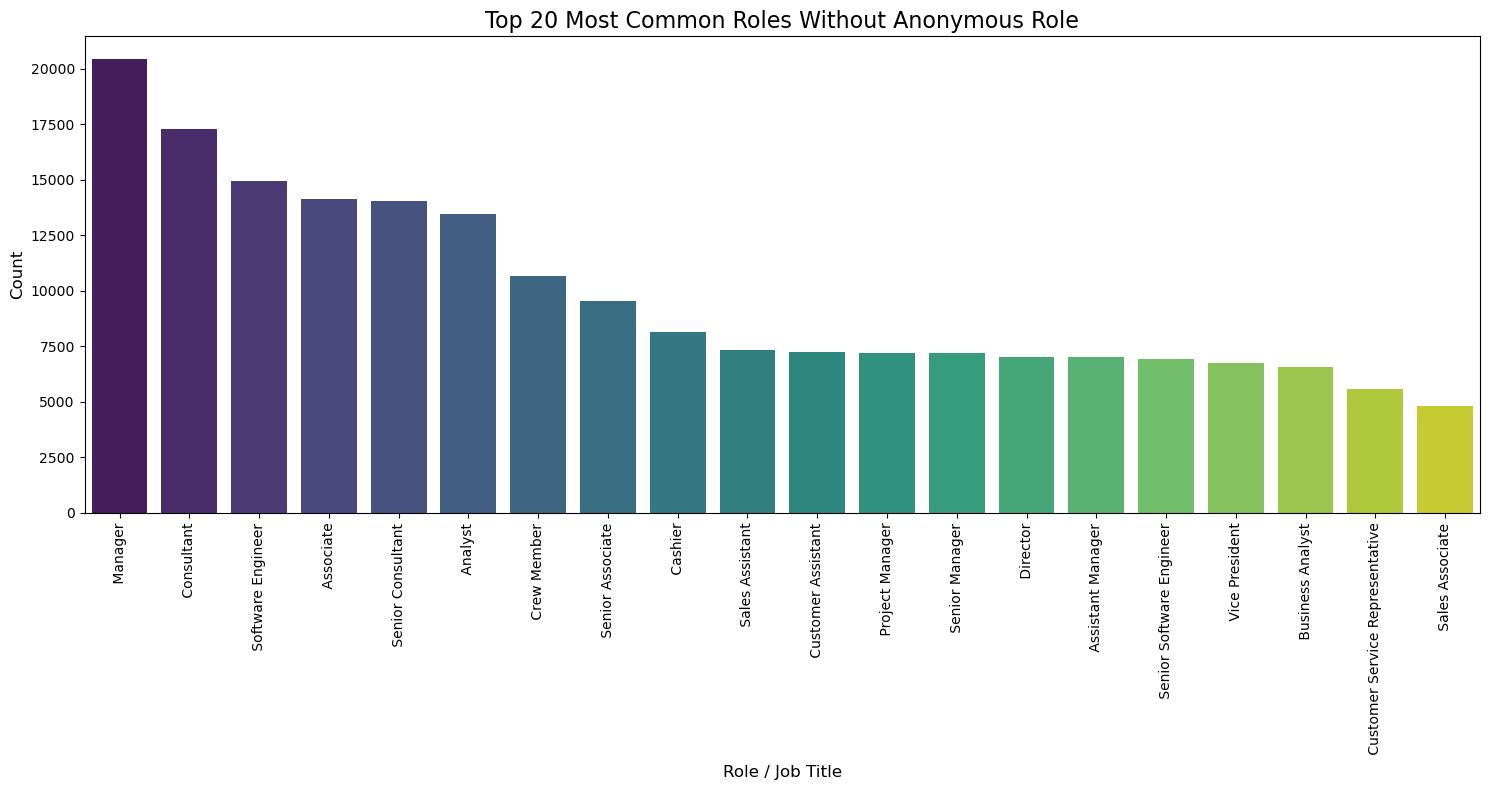

In [8]:
# Standardize 'Anonymous Employee' entries in 'role' column
values_to_replace = [
    'Anonymous Employee', 
    ' ',  # Empty space
    'Current Employee - Anonymous Employee',
    ' Anonymous Employee',
    'nan',
    'Former Employee - Anonymous Employee'
]

new_value = 'Anonymous Employee'
df['role'] = df['role'].replace(values_to_replace, new_value)
role_counts = df['role'].value_counts()
if 'Anonymous Employee' in role_counts.index:
    role_counts_filtered = role_counts.drop('Anonymous Employee')
else:
    role_counts_filtered = role_counts

top_20_filtered_roles = role_counts_filtered.head(20)

plt.figure(figsize=(15, 8))
sns.barplot(
    x=top_20_filtered_roles.index,
    y=top_20_filtered_roles.values,
    palette='viridis'
)

plt.title('Top 20 Most Common Roles Without Anonymous Role', fontsize=16)
plt.xlabel('Role / Job Title', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=90)
plt.tight_layout()

plot_filename = 'top_20_roles_vertical_barchart.png'
plt.savefig('visualizations/' + plot_filename)

print(f"Successfully saved vertical bar chart to '{plot_filename}'")

This bar chart showing the most common job role without missing data (Anonymous Role) reveals a wide variety of job professions. Understandably, Manager is the most common role as that role exists in every industry. Remarkably, the difference in numbers in each role after the top 10 roles seem to not vary by much.

Successfully saved scatterplot to 'satisfaction_vs_burnout_scatterplot.png'


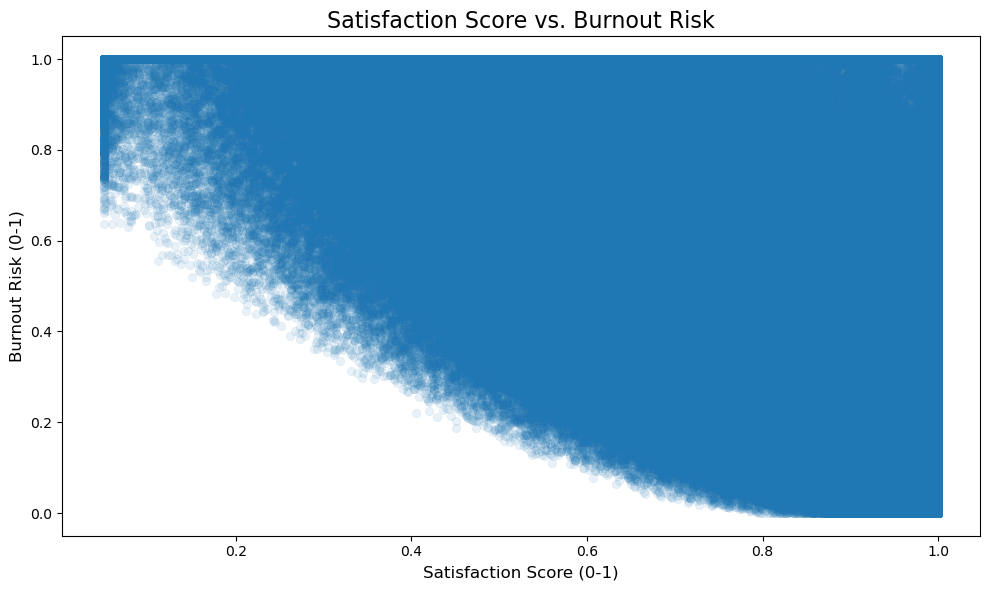

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df, 
    x='satisfaction_score', 
    y='burnout_risk',
    alpha=0.1,
    edgecolor=None
)

plt.title('Satisfaction Score vs. Burnout Risk', fontsize=16)
plt.xlabel('Satisfaction Score (0-1)', fontsize=12)
plt.ylabel('Burnout Risk (0-1)', fontsize=12)

plt.tight_layout()

plot_filename = 'satisfaction_vs_burnout_scatterplot.png'
plt.savefig('visualizations/' + plot_filename)

print(f"Successfully saved scatterplot to '{plot_filename}'")

This scatterplot shows a clear negative correlation between the two variables. As satisfaction_score increases, burnout_risk decreases. Employees with high satisfaction consistently have a low risk of burnout, while employees with low satisfaction can have a wide range of burnout risks, including the very highest.

### Preprocess Data Approach

We will split our dataset 80:20 test and train groups. We will maintain class proportions using the stratify argument in sklearn. 

Our target variable `left_company` has unequal distribution with 71% staying and 29% leaving for training. We will test a few methods to balance our target. Both SMOTE and ADASYN could perform well. We don't want to drop observations as some of our dependent variables have classes with very few members or distributions with long tails. 

The majority of our potential dependent variables are risk scores and ratings (ex: `performance_score`, `team_sentiment`) that are already standardized and will not require additional preprocessing for training. However, there are several below that we will address before training. 

| Variable | PreProcessing Steps |
| :--- | :--- |
| role | Transform - one hot encoding |
| job_level | Transform - one hot encoding |
| department | Transform - one hot encoding |
| tenure_months | Normalize |
| salary | Normalize |







## Store Variables for model.ipynb

Use IPython's `%store` to persist `df` and `continuous_vars` so they can be restored in `model.ipynb`.

In [10]:
# Store the processed dataframe and continuous variable list
%store df
%store continuous_vars

Stored 'df' (DataFrame)
Stored 'continuous_vars' (list)
